In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

## The Dataset
#### This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants. https://www.kaggle.com/datasets/kartik2112/fraud-detection/data


In [28]:
fraudTrain_df = pd.read_csv('fraudTrain.csv')

In [29]:
fraudTrain_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [30]:
fraudTest_df = pd.read_csv('fraudTest.csv')

In [31]:
fraudTest_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232757,232757,2020-09-13 11:29:03,4810839835482794272,fraud_Friesen-Stamm,gas_transport,44.52,Carolyn,Perez,F,433 Blake Roads Suite 967,...,36.7651,-94.0492,760,Production manager,1985-08-31,ec8edce199d206bde7e1aa80342cc62a,1.379072e+09,36.222694,-94.207297,0.0
232758,232758,2020-09-13 11:29:56,4449530933957323,fraud_Dooley Inc,shopping_pos,1.14,Felicia,Mckee,F,84079 Thomas Burgs,...,38.2427,-122.9145,337,Occupational psychologist,1954-07-05,2c036aa310c38557ebe693ac4e4b162e,1.379072e+09,37.636620,-122.648964,0.0
232759,232759,2020-09-13 11:31:07,374238209524200,fraud_Stamm-Witting,shopping_net,8.03,Daniel,Martinez,M,8510 Acevedo Burgs,...,45.0838,-120.6649,60,Museum education officer,1942-04-03,c4da184d6a4652b0ae3139bc354064cc,1.379072e+09,44.312397,-120.544452,0.0
232760,232760,2020-09-13 11:31:20,3583635130604947,fraud_Brown PLC,misc_net,120.93,Crystal,Gamble,F,899 Michele View Suite 960,...,40.0369,-75.0664,1526206,Structural engineer,1985-01-01,3c45b1981033dbb949b98cf4e37e205b,1.379072e+09,39.929007,-75.826393,0.0


## Plots

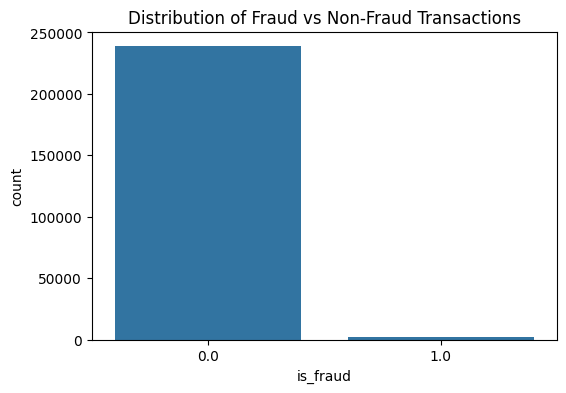

In [32]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=fraudTrain_df)
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()

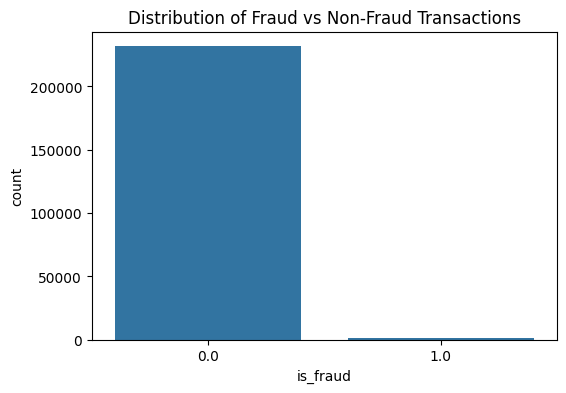

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=fraudTest_df)
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()

Text(0, 0.5, 'Frequency')

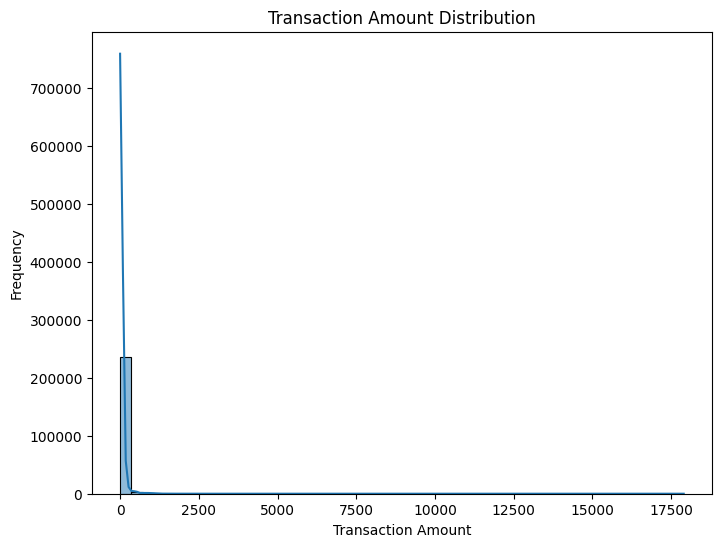

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(fraudTrain_df['amt'], kde=True, bins=50)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')

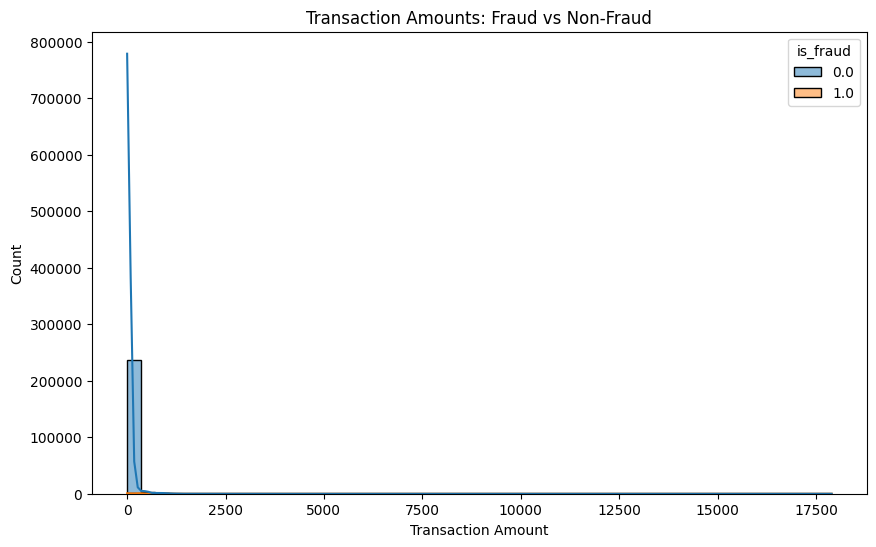

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(data=fraudTrain_df, x='amt', hue='is_fraud', multiple='stack', bins=50, kde=True)
plt.title('Transaction Amounts: Fraud vs Non-Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()


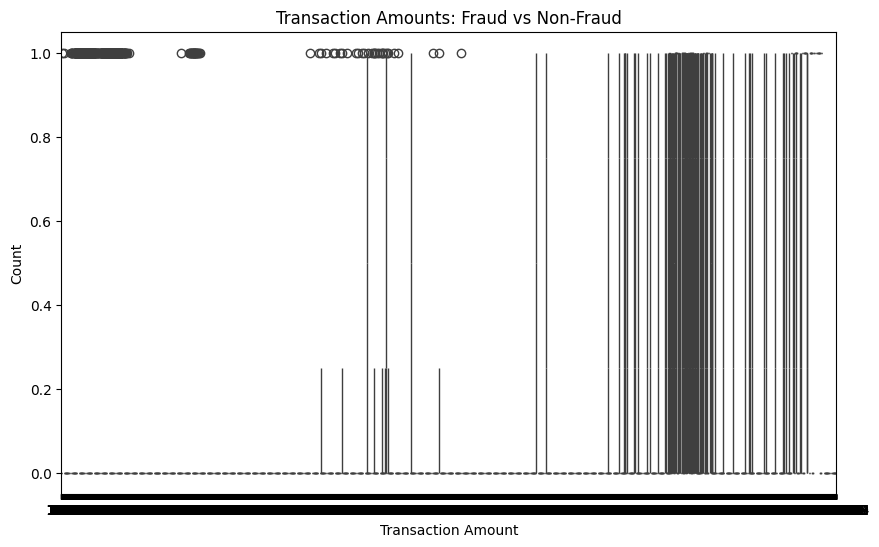

In [36]:
plt.figure(figsize=(10, 6))
# sns.scatterplot(data=fraudTrain_df, x='amt', hue='is_fraud')
sns.boxplot(data=fraudTrain_df, x='amt', y='is_fraud')
plt.title('Transaction Amounts: Fraud vs Non-Fraud')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()


Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


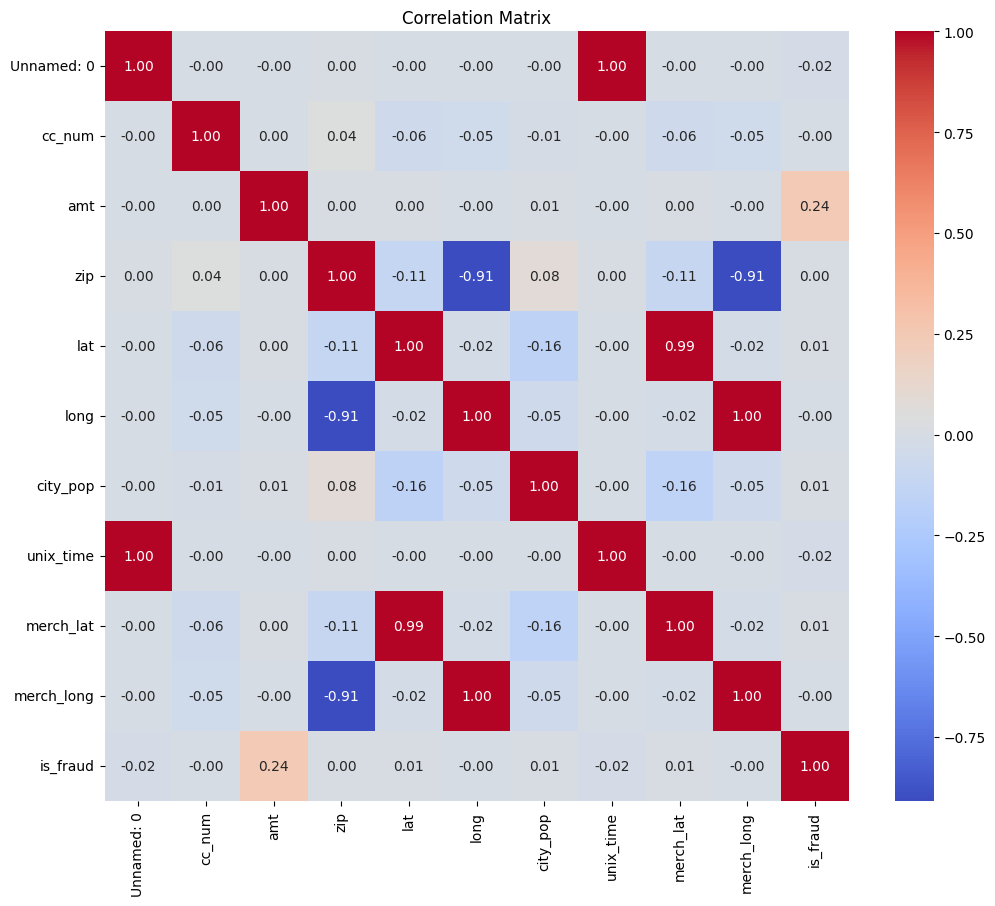

In [37]:
# Selecting only numeric columns
numeric_columns = fraudTrain_df.select_dtypes(include=['number']).columns
print(numeric_columns)

# Creating a correlation matrix with only numeric columns
corr_matrix = fraudTrain_df[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


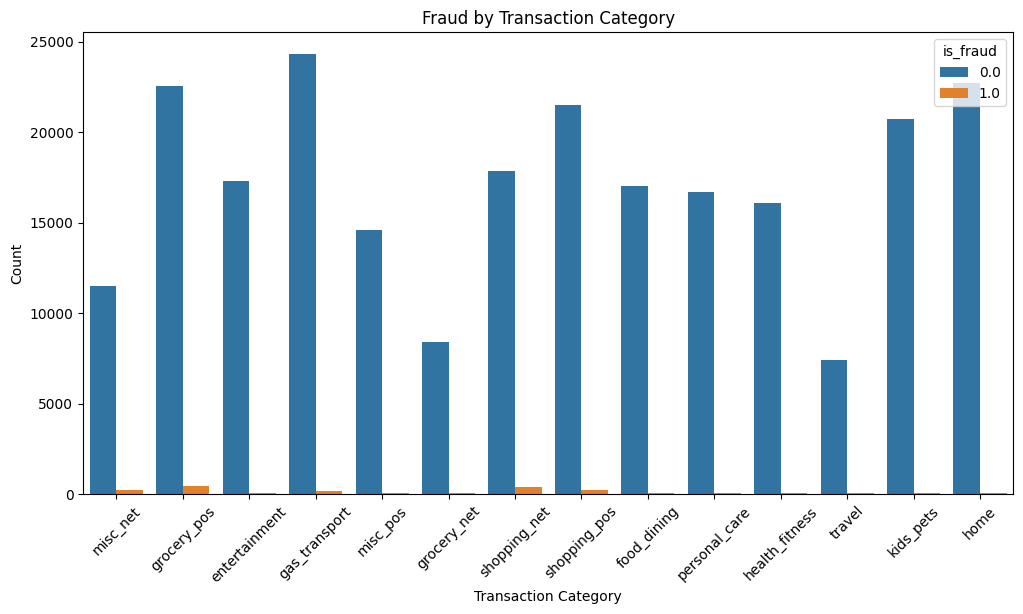

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='is_fraud', data=fraudTrain_df)
plt.xticks(rotation=45)
plt.title('Fraud by Transaction Category')
plt.xlabel('Transaction Category')
plt.ylabel('Count')
plt.show()


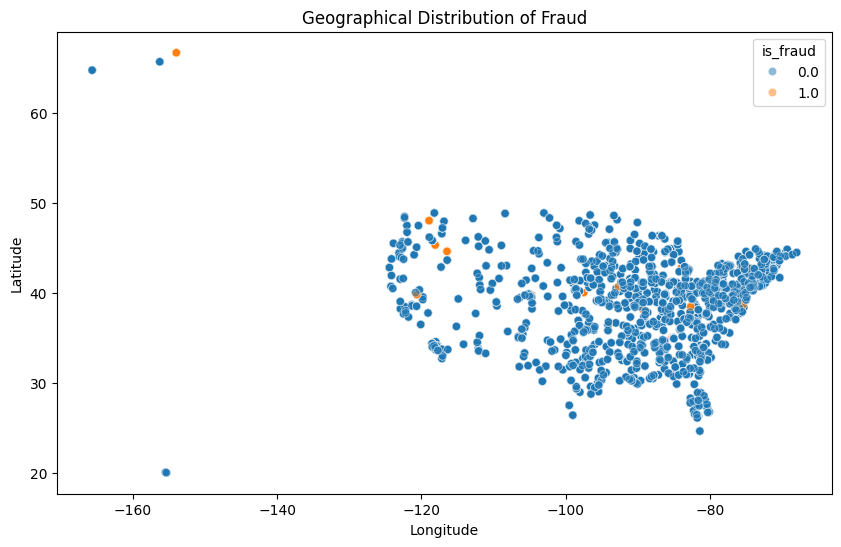

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=fraudTrain_df, alpha=0.5)
plt.title('Geographical Distribution of Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


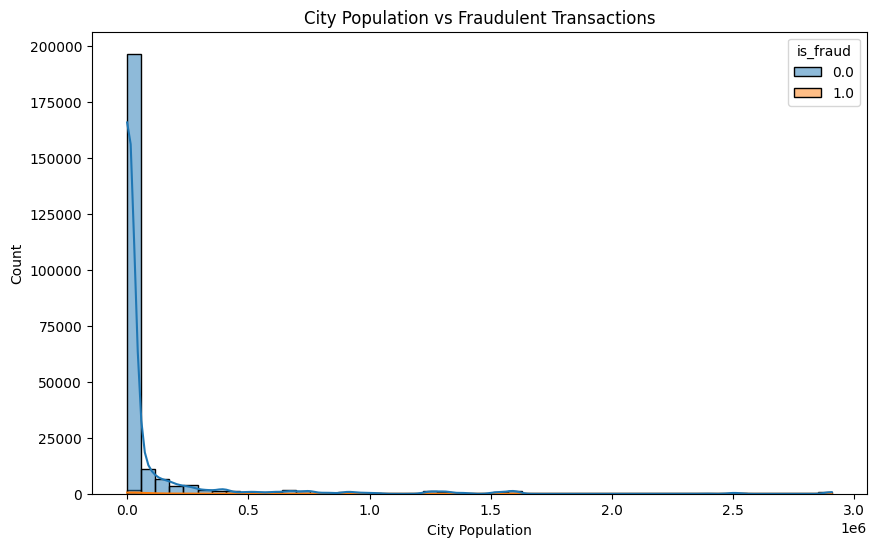

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=fraudTrain_df, x='city_pop', hue='is_fraud', bins=50, kde=True)
plt.title('City Population vs Fraudulent Transactions')
plt.xlabel('City Population')
plt.ylabel('Count')
plt.show()


In [41]:
# Drop irrelevant columns
columns_to_drop = ['Unnamed: 0', 'first', 'last', 'street', 'zip', 'lat', 'long', 'merch_lat', 'merch_long', 'cc_num', 'trans_num', 'trans_date_trans_time']
fraudTrain_df = fraudTrain_df.drop(columns=columns_to_drop)
fraudTest_df = fraudTest_df.drop(columns=columns_to_drop)

In [42]:
# Encode categorical columns
categorical_columns = ['merchant', 'category', 'gender', 'job', 'state', 'city']
label_encoders = {}


# Fill missing values in categorical columns
fraudTrain_df[categorical_columns] = fraudTrain_df[categorical_columns].fillna('Unknown')
fraudTest_df[categorical_columns] = fraudTest_df[categorical_columns].fillna('Unknown')

# Factorize categorical columns and apply the same encoding for both sets
for col in categorical_columns:
    # Get unique categories from both train and test data
    combined_values = pd.concat([fraudTrain_df[col], fraudTest_df[col]], axis=0)

    # Encode combined values
    codes, uniques = pd.factorize(combined_values, sort=True)

    # Assign encoded values back to train and test data
    fraudTrain_df[col] = pd.Categorical(fraudTrain_df[col], categories=uniques).codes
    fraudTest_df[col] = pd.Categorical(fraudTest_df[col], categories=uniques).codes

# Verify encoded data
print(fraudTrain_df.head())
print(fraudTest_df.head())


   merchant  category     amt  gender  city  state  city_pop  job         dob  \
0       514         8    4.97       0   510     27    3495.0  362  1988-03-09   
1       241         4  107.23       0   587     48     149.0  419  1978-06-21   
2       390         0  220.11       1   456     13    4154.0  299  1962-01-19   
3       360         2   45.00       1    83     26    1939.0  321  1967-01-12   
4       297         9   41.96       1   211     46      99.0  113  1986-03-28   

      unix_time  is_fraud  
0  1.325376e+09       0.0  
1  1.325376e+09       0.0  
2  1.325376e+09       0.0  
3  1.325376e+09       0.0  
4  1.325376e+09       0.0  
   merchant  category    amt  gender  city  state  city_pop  job         dob  \
0       319        10   2.86       1   163     40    333497  279  1968-03-19   
1       591        10  29.84       0    16     44       302  396  1990-01-17   
2       611         5  41.28       0    63     34     34496  263  1970-10-21   
3       222         9  60

In [43]:
# Define X and y for train and test sets
X_train = fraudTrain_df.drop('is_fraud', axis=1)
y_train = fraudTrain_df['is_fraud']
X_test = fraudTest_df.drop('is_fraud', axis=1)
y_test = fraudTest_df['is_fraud']

# View the processed X_train head
print(X_train.head())

   merchant  category     amt  gender  city  state  city_pop  job         dob  \
0       514         8    4.97       0   510     27    3495.0  362  1988-03-09   
1       241         4  107.23       0   587     48     149.0  419  1978-06-21   
2       390         0  220.11       1   456     13    4154.0  299  1962-01-19   
3       360         2   45.00       1    83     26    1939.0  321  1967-01-12   
4       297         9   41.96       1   211     46      99.0  113  1986-03-28   

      unix_time  
0  1.325376e+09  
1  1.325376e+09  
2  1.325376e+09  
3  1.325376e+09  
4  1.325376e+09  


In [44]:
X_train

,merchant,category,amt,gender,city,state,city_pop,job,dob,unix_time
0,514,8,4.97,0,510,27,3495.0,362,1988-03-09,1.325376e+09
1,241,4,107.23,0,587,48,149.0,419,1978-06-21,1.325376e+09
2,390,0,220.11,1,456,13,4154.0,299,1962-01-19,1.325376e+09
3,360,2,45.00,1,83,26,1939.0,321,1967-01-12,1.325376e+09
4,297,9,41.96,1,211,46,99.0,113,1986-03-28,1.325376e+09
...,...,...,...,...,...,...,...,...,...,...
240545,195,0,27.78,1,309,9,33804.0,183,1991-01-01,1.335791e+09
240546,163,10,14.41,0,708,20,313.0,243,1976-03-26,1.335791e+09
240547,421,11,1.69,1,231,36,116001.0,280,1993-05-10,1.335791e+09
240548,133,0,106.71,1,581,12,568.0,90,1969-07-24,1.335791e+09


In [45]:
X_test

,merchant,category,amt,gender,city,state,city_pop,job,dob,unix_time
0,319,10,2.86,1,163,40,333497,279,1968-03-19,1.371817e+09
1,591,10,29.84,0,16,44,302,396,1990-01-17,1.371817e+09
2,611,5,41.28,0,63,34,34496,263,1970-10-21,1.371817e+09
3,222,9,60.05,1,774,9,54767,412,1987-07-25,1.371817e+09
4,292,13,3.19,1,254,22,1126,200,1955-07-06,1.371817e+09
...,...,...,...,...,...,...,...,...,...,...
232757,183,2,44.52,0,842,24,760,354,1985-08-31,1.379072e+09
232758,141,12,1.14,0,776,4,337,307,1954-07-05,1.379072e+09
232759,593,11,8.03,1,393,37,60,293,1942-04-03,1.379072e+09
232760,79,8,120.93,0,618,38,1526206,426,1985-01-01,1.379072e+09


In [46]:
y_train

,is_fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
240545,0.0
240546,0.0
240547,0.0
240548,0.0


In [47]:
y_test

,is_fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
232757,0.0
232758,0.0
232759,0.0
232760,0.0


#### # Replace NaNs with 0, or choose another appropriate value instead dropping to maintain consistency

In [48]:
y_train = y_train.fillna(0.0)
y_train

,is_fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
240545,0.0
240546,0.0
240547,0.0
240548,0.0


In [49]:
y_test = y_test.fillna(0.0)
y_test

,is_fraud
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
232757,0.0
232758,0.0
232759,0.0
232760,0.0


In [50]:
from datetime import datetime

# Assuming X_train and X_test are your training and test DataFrames

# Convert dob to age
reference_date = datetime(2019, 1, 1)  # Example reference date based on your dataset
X_train['dob'] = pd.to_datetime(X_train['dob'], errors='coerce')
X_test['dob'] = pd.to_datetime(X_test['dob'], errors='coerce')

# Calculate age and handle missing values
X_train['age'] = X_train['dob'].apply(lambda x: reference_date.year - x.year if pd.notnull(x) else np.nan)
X_test['age'] = X_test['dob'].apply(lambda x: reference_date.year - x.year if pd.notnull(x) else np.nan)

# Impute missing ages with the median age
X_train['age'].fillna(X_train['age'].median(), inplace=True)
X_test['age'].fillna(X_test['age'].median(), inplace=True)

# Drop dob column as age is now being used
X_train.drop('dob', axis=1, inplace=True)
X_test.drop('dob', axis=1, inplace=True)

# Interpolate missing unix_time values
X_train['unix_time'].interpolate(method='linear', inplace=True)
X_test['unix_time'].interpolate(method='linear', inplace=True)

# Verify the results
print(X_train.head())
print(X_test.head())

   merchant  category     amt  gender  city  state  city_pop  job  \
0       514         8    4.97       0   510     27    3495.0  362   
1       241         4  107.23       0   587     48     149.0  419   
2       390         0  220.11       1   456     13    4154.0  299   
3       360         2   45.00       1    83     26    1939.0  321   
4       297         9   41.96       1   211     46      99.0  113   

      unix_time   age  
0  1.325376e+09  31.0  
1  1.325376e+09  41.0  
2  1.325376e+09  57.0  
3  1.325376e+09  52.0  
4  1.325376e+09  33.0  
   merchant  category    amt  gender  city  state  city_pop  job  \
0       319        10   2.86       1   163     40    333497  279   
1       591        10  29.84       0    16     44       302  396   
2       611         5  41.28       0    63     34     34496  263   
3       222         9  60.05       1   774      9     54767  412   
4       292        13   3.19       1   254     22      1126  200   

      unix_time  age  
0  1.3718

In [51]:
X_train

,merchant,category,amt,gender,city,state,city_pop,job,unix_time,age
0,514,8,4.97,0,510,27,3495.0,362,1.325376e+09,31.0
1,241,4,107.23,0,587,48,149.0,419,1.325376e+09,41.0
2,390,0,220.11,1,456,13,4154.0,299,1.325376e+09,57.0
3,360,2,45.00,1,83,26,1939.0,321,1.325376e+09,52.0
4,297,9,41.96,1,211,46,99.0,113,1.325376e+09,33.0
...,...,...,...,...,...,...,...,...,...,...
240545,195,0,27.78,1,309,9,33804.0,183,1.335791e+09,28.0
240546,163,10,14.41,0,708,20,313.0,243,1.335791e+09,43.0
240547,421,11,1.69,1,231,36,116001.0,280,1.335791e+09,26.0
240548,133,0,106.71,1,581,12,568.0,90,1.335791e+09,50.0


In [52]:
X_test

,merchant,category,amt,gender,city,state,city_pop,job,unix_time,age
0,319,10,2.86,1,163,40,333497,279,1.371817e+09,51
1,591,10,29.84,0,16,44,302,396,1.371817e+09,29
2,611,5,41.28,0,63,34,34496,263,1.371817e+09,49
3,222,9,60.05,1,774,9,54767,412,1.371817e+09,32
4,292,13,3.19,1,254,22,1126,200,1.371817e+09,64
...,...,...,...,...,...,...,...,...,...,...
232757,183,2,44.52,0,842,24,760,354,1.379072e+09,34
232758,141,12,1.14,0,776,4,337,307,1.379072e+09,65
232759,593,11,8.03,1,393,37,60,293,1.379072e+09,77
232760,79,8,120.93,0,618,38,1526206,426,1.379072e+09,34


## Scallig and Resampling

#### Scaling the datasets

In [53]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### SMOTE

In [54]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Change strategy to 'median' or 'constant' if needed
X_train = imputer.fit_transform(X_train_scaled)

In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## Train the Model

In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)
importances = model.feature_importances_

In [57]:
importances

array([0.01876597, 0.16734036, 0.60768629, 0.00881396, 0.0283173 ,
       0.02971073, 0.03313546, 0.02603243, 0.04064818, 0.03954932])

### Train the Models

In [58]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle # allows us to save our ml models

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier


In [59]:
def evaluate_and_save(model, X_train, y_train, X_test, y_test, filename):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")
  print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")
  print("------------------------------------")

  # wb opens the file in binary mode
  with open(filename, 'wb') as file:
    pickle.dump(model, file)

  print(f"Model saved to {filename}")

In [60]:
# X_train = X_resampled
# y_train = y_resampled
# X_test = X_test_scaled

In [61]:
# X_train.head()

In [62]:
# from sys import set_coroutine_origin_tracking_depth
# xgb_model = xgb.XGBClassifier(random_state=42)
# evaluate_and_save(xgb_model, X_train, y_train, X_test, y_test, "xgb_model.pkl")

In [63]:
xgb_model = xgb.XGBClassifier(random_state=42)
evaluate_and_save(xgb_model, X_resampled, y_resampled, X_test_scaled, y_test, "xgb_model.pkl")

XGBClassifier Accuracy: 0.9964

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    231750
         1.0       0.59      0.58      0.59      1012

    accuracy                           1.00    232762
   macro avg       0.80      0.79      0.79    232762
weighted avg       1.00      1.00      1.00    232762

------------------------------------
Model saved to xgb_model.pkl


In [64]:
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_save(dt_model, X_resampled, y_resampled, X_test_scaled, y_test, "dt_model.pkl")

rf_model = RandomForestClassifier(random_state=42)
evaluate_and_save(rf_model, X_resampled, y_resampled, X_test_scaled, y_test, "rf_model.pkl")

nb_model = GaussianNB()
evaluate_and_save(nb_model, X_resampled, y_resampled, X_test_scaled, y_test, "nb_model.pkl")

knn_model = KNeighborsClassifier()
evaluate_and_save(knn_model, X_resampled, y_resampled, X_test_scaled, y_test, "knn_model.pkl")

svm_model = SVC(random_state=42)
evaluate_and_save(svm_model, X_resampled, y_resampled, X_test_scaled, y_test, "svm_model.pkl")

ada_model = AdaBoostClassifier(random_state=42)
evaluate_and_save(ada_model, X_resampled, y_resampled, X_test_scaled, y_test, "ada_model.pkl")

DecisionTreeClassifier Accuracy: 0.9945

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    231750
         1.0       0.40      0.54      0.46      1012

    accuracy                           0.99    232762
   macro avg       0.70      0.77      0.73    232762
weighted avg       1.00      0.99      0.99    232762

------------------------------------
Model saved to dt_model.pkl
RandomForestClassifier Accuracy: 0.9964

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    231750
         1.0       0.70      0.28      0.40      1012

    accuracy                           1.00    232762
   macro avg       0.85      0.64      0.70    232762
weighted avg       1.00      1.00      1.00    232762

------------------------------------
Model saved to rf_model.pkl
GaussianNB Accuracy: 0.9938

Classification Report:
              precision    recall  f